In [1]:
import matplotlib.pyplot as plt

"""
Small demo to illustrate how the plot function and the gridworld environment work
"""
import numpy as np
import optuna
from gridworld import *
from plot import *
import optimize_steps
import optimize_episodes
import select_action
from sarsa import *
from qlearning import *
#from optimize import *

COUNT_ENVIRONMENT = 10

In [2]:
def load_study(study_name, storage):
    loaded_study = optuna.load_study(study_name=study_name, storage=storage)
    best_params = loaded_study.best_trial.params
    return best_params

In [3]:
Q_PARAMS_A1_decay_epsilon = load_study('qlearning_a1_decay_epsilon','sqlite:///hyperparameters_A1.db')
Q_PARAMS_A1_epsilon = load_study('qlearning_a1_epsilon','sqlite:///hyperparameters_A1.db')
Q_PARAMS_A1_ucb = load_study('qlearning_a1_ucb','sqlite:///hyperparameters_A1.db')

SARSA_PARAMS_A1_decay_epsilon = load_study('sarsa_a1_decay_epsilon','sqlite:///hyperparameters_A1.db')
SARSA_PARAMS_A1_epsilon = load_study('sarsa_a1_epsilon','sqlite:///hyperparameters_A1.db')
SARSA_PARAMS_A1_UCB = load_study('sarsa_a1_ucb','sqlite:///hyperparameters_A1.db')

In [4]:
SARSA_PARAMS_A2_decay_epsilon = load_study('sarsa_a2_decay_epsilon','sqlite:///hyperparameters_A2.db')
SARSA_PARAMS_A2_epsilon = load_study('sarsa_a2_epsilon','sqlite:///hyperparameters_A2.db')
SARSA_PARAMS_A2_UCB = load_study('sarsa_a2_ucb','sqlite:///hyperparameters_A2.db')


Q_PARAMS_A2_decay_epsilon = load_study('qlearning_a2_decay_epsilon','sqlite:///hyperparameters_A2.db')
Q_PARAMS_A2_epsilon = load_study('qlearning_a2_epsilon','sqlite:///hyperparameters_A2.db')
Q_PARAMS_A2_ucb = load_study('qlearning_a2_ucb','sqlite:///hyperparameters_A2.db')



In [5]:
#a1_env = Random(size=12, water=0.3, mountain=0)
#a2_env = Random(size = 12, water=0, mountain=0.3)

#study2 = optimize_episodes.optimize_episodes(a2_env)
#study2.study_qlearning_decay_epsilon("qlearning_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
#study2.study_qlearning_epsilon_greedy("qlearning_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
#study2.study_qlearning_ucb("qlearning_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")

#study2.study_sarsa_decay_epsilon("sarsa_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
#study2.study_sarsa_epsilon_greedy("sarsa_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
#study2.study_sarsa_ucb("sarsa_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")



#study = optimize_steps.optimize_steps(a1_env)
#study.study_qlearning_decay_epsilon("qlearning_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
#study.study_sarsa_epsilon_greedy("sarsa_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")

#study.study_qlearning_epsilon_greedy("qlearning_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
#study.study_qlearning_ucb("qlearning_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

#study.study_sarsa_decay_epsilon("sarsa_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
#study.study_sarsa_ucb("sarsa_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

# Plot 1: Cumulative reward of the current episode over episodes

In [9]:
qlearning_data={}
sarsa_data={}
qlearning_data_no_decay={}
sarsa_data_no_decay={}
qlearning_data_ucb={}
sarsa_data_ucb={}
envs_A1 = []


q = qlearning(Q_PARAMS_A1_decay_epsilon['ALPHA'],
                  Q_PARAMS_A1_decay_epsilon['GAMMA'],
                  Q_PARAMS_A1_decay_epsilon['EPISODES'],
                  Q_PARAMS_A1_decay_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1_decay_epsilon['INIT_VALUE'],
                  Q_PARAMS_A1_decay_epsilon['EPS'],
                  Q_PARAMS_A1_decay_epsilon['DECAY'])


q_no_decay = qlearning(Q_PARAMS_A1_epsilon['ALPHA'],
                  Q_PARAMS_A1_epsilon['GAMMA'],
                  Q_PARAMS_A1_epsilon['EPISODES'],
                  Q_PARAMS_A1_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1_epsilon['INIT_VALUE'],
                  Q_PARAMS_A1_epsilon['EPS'])

q_ucb = qlearning(Q_PARAMS_A1_ucb['ALPHA'],
          Q_PARAMS_A1_ucb['GAMMA'],
          Q_PARAMS_A1_ucb['EPISODES'],
          Q_PARAMS_A1_ucb['MAX_EPISODE_LENGTH'],
          Q_PARAMS_A1_ucb['INIT_VALUE'],
          Q_PARAMS_A1_ucb['EPS']
          )

s = sarsa(SARSA_PARAMS_A1_decay_epsilon['ALPHA'],
          SARSA_PARAMS_A1_decay_epsilon['GAMMA'],
          SARSA_PARAMS_A1_decay_epsilon['EPISODES'],
          SARSA_PARAMS_A1_decay_epsilon['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1_decay_epsilon['INIT_VALUE'],
          SARSA_PARAMS_A1_decay_epsilon['EPS'],
          SARSA_PARAMS_A1_decay_epsilon['DECAY'])

s_no_decay = sarsa(Q_PARAMS_A1_epsilon['ALPHA'],
          Q_PARAMS_A1_epsilon['GAMMA'],
          Q_PARAMS_A1_epsilon['EPISODES'],
          Q_PARAMS_A1_epsilon['MAX_EPISODE_LENGTH'],
          Q_PARAMS_A1_epsilon['INIT_VALUE'],
          Q_PARAMS_A1_epsilon['EPS'])

s_ucb = sarsa(SARSA_PARAMS_A1_UCB['ALPHA'],
          SARSA_PARAMS_A1_UCB['GAMMA'],
          SARSA_PARAMS_A1_UCB['EPISODES'],
          SARSA_PARAMS_A1_UCB['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1_UCB['INIT_VALUE'],
          SARSA_PARAMS_A1_UCB['EPS']
          )

env = Random(size=12, water=0.3, mountain=0)



for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0.3, mountain=0)
    envs_A1.append(env)     
    print(f"running environment: {i}")
    
    qlearning_data[i] = q.run_decay_epsilon_greedy(env)
    sarsa_data[i] = s.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay[i] = q_no_decay.run_epsilon_greedy(env)
    sarsa_data_no_decay[i] = s_no_decay.run_epsilon_greedy(env)
    
    qlearning_data_ucb[i] = q_ucb.run_ucb(env)
    sarsa_data_ucb[i] = s_ucb.run_ucb(env)


running environment: 0
running environment: 1
running environment: 2
running environment: 3
running environment: 4
running environment: 5
running environment: 6
running environment: 7
running environment: 8
running environment: 9


## Decaying Epsilon Greedy

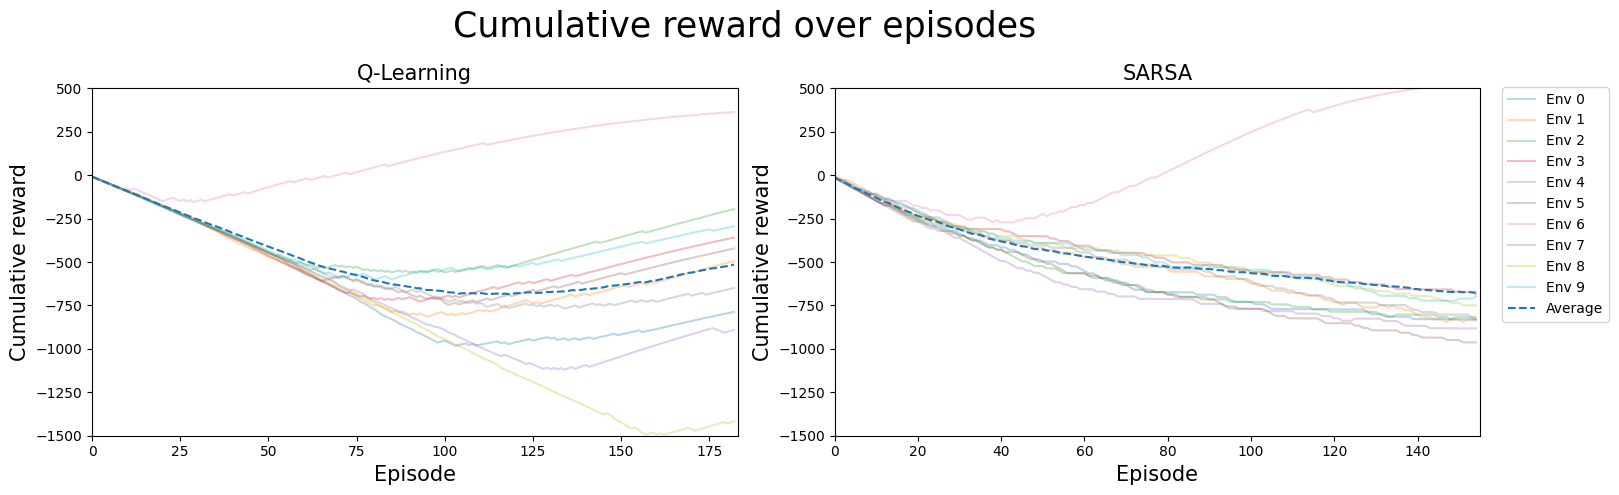

In [10]:
plot_episodes([qlearning_data, sarsa_data], [Q_PARAMS_A1_decay_epsilon['EPISODES'], SARSA_PARAMS_A1_decay_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-1500,500])

## Epsilon Greedy

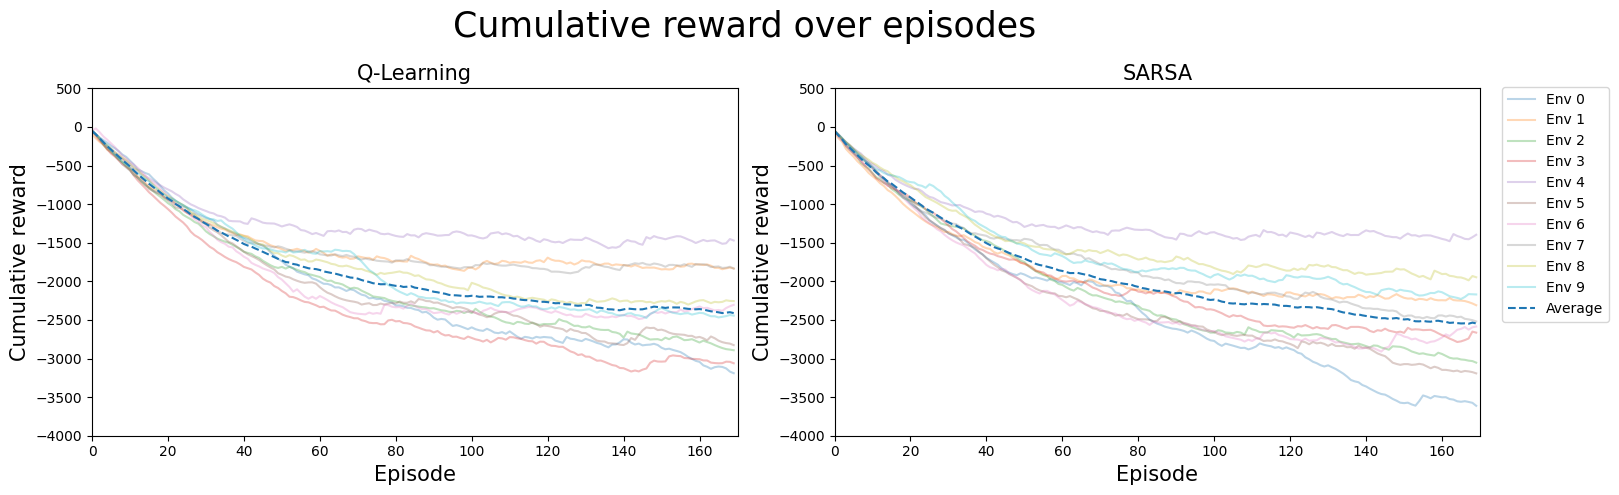

In [11]:
plot_episodes([qlearning_data_no_decay, sarsa_data_no_decay], [Q_PARAMS_A1_epsilon['EPISODES'], Q_PARAMS_A1_epsilon['EPISODES']], ['Q-Learning', 'SARSA'], [-4000,500])

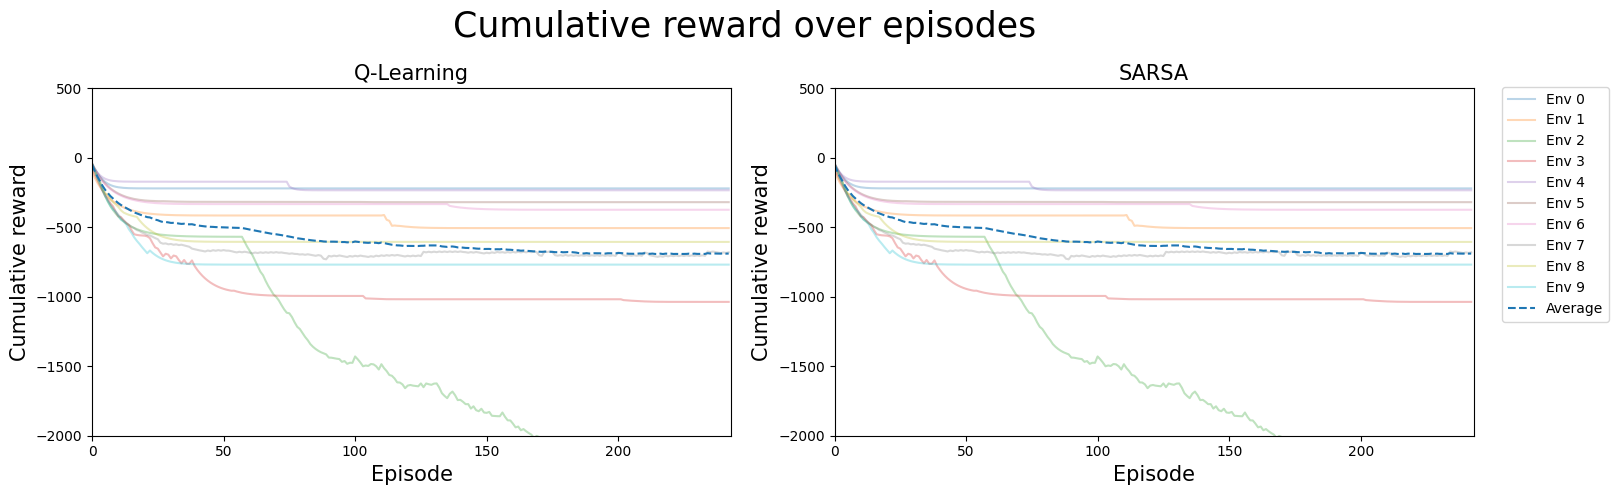

In [13]:
plot_episodes([qlearning_data_ucb, qlearning_data_ucb], [Q_PARAMS_A1_ucb['EPISODES'], Q_PARAMS_A1_ucb['EPISODES']], ['Q-Learning', 'SARSA'], [-2000,500])

# Plot 2: Cumulative reward over amount of steps

In [14]:
qlearning_data_A2={}
sarsa_data_A2={}
qlearning_data_no_decay_A2={}
qlearning_data_ucb_A2={}
sarsa_data_ucb_A2 = {}
sarsa_data_no_decay_A2={}
envs2 = []

q2 = qlearning(Q_PARAMS_A2_decay_epsilon['ALPHA'],
                Q_PARAMS_A2_decay_epsilon['GAMMA'],
                Q_PARAMS_A2_decay_epsilon['EPISODES'],
                Q_PARAMS_A2_decay_epsilon['MAX_EPISODE_LENGTH'],
                Q_PARAMS_A2_decay_epsilon['INIT_VALUE'],
                Q_PARAMS_A2_decay_epsilon['EPS'],
                Q_PARAMS_A2_decay_epsilon['DECAY'])

s2 = sarsa(SARSA_PARAMS_A2_decay_epsilon['ALPHA'],
            SARSA_PARAMS_A2_decay_epsilon['GAMMA'],
            SARSA_PARAMS_A2_decay_epsilon['EPISODES'],
            SARSA_PARAMS_A2_decay_epsilon['MAX_EPISODE_LENGTH'],
            SARSA_PARAMS_A2_decay_epsilon['INIT_VALUE'],
            SARSA_PARAMS_A2_decay_epsilon['EPS'],
            SARSA_PARAMS_A2_decay_epsilon['DECAY'])

s_no_decay_2 = sarsa(SARSA_PARAMS_A2_epsilon['ALPHA'],
          SARSA_PARAMS_A2_epsilon['GAMMA'],
          SARSA_PARAMS_A2_epsilon['EPISODES'],
          SARSA_PARAMS_A2_epsilon['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A2_epsilon['INIT_VALUE'],
          SARSA_PARAMS_A2_epsilon['EPS'])

q_no_decay_2 = qlearning(Q_PARAMS_A2_epsilon['ALPHA'],
                  Q_PARAMS_A2_epsilon['GAMMA'],
                  Q_PARAMS_A2_epsilon['EPISODES'],
                  Q_PARAMS_A2_epsilon['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A2_epsilon['INIT_VALUE'],
                  Q_PARAMS_A2_epsilon['EPS'])

q_ucb_2 = qlearning(Q_PARAMS_A2_ucb['ALPHA'],
                  Q_PARAMS_A2_ucb['GAMMA'],
                  Q_PARAMS_A2_ucb['EPISODES'],
                  Q_PARAMS_A2_ucb['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A2_ucb['INIT_VALUE'],
                  Q_PARAMS_A2_ucb['EPS'])

s_ucb_2 = qlearning(SARSA_PARAMS_A2_UCB['ALPHA'],
                  SARSA_PARAMS_A2_UCB['GAMMA'],
                  SARSA_PARAMS_A2_UCB['EPISODES'],
                  SARSA_PARAMS_A2_UCB['MAX_EPISODE_LENGTH'],
                  SARSA_PARAMS_A2_UCB['INIT_VALUE'],
                  SARSA_PARAMS_A2_UCB['EPS'])

for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0, mountain=0.3)
    envs2.append(env)
    print(f"running env: {i}")
    
    qlearning_data_A2[i] = q2.run_decay_epsilon_greedy(env)
    sarsa_data_A2[i] = s2.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay_A2[i] = q_no_decay_2.run_epsilon_greedy(env)
    sarsa_data_no_decay_A2[i] = s_no_decay_2.run_epsilon_greedy(env)
    
    qlearning_data_ucb_A2[i] = q_ucb_2.run_ucb(env)
    sarsa_data_ucb_A2[i] = s_ucb_2.run_ucb(env)



running env: 0
running env: 1
running env: 2
running env: 3
running env: 4
running env: 5
running env: 6
running env: 7
running env: 8
running env: 9


# Decaying Epsilon Greedy

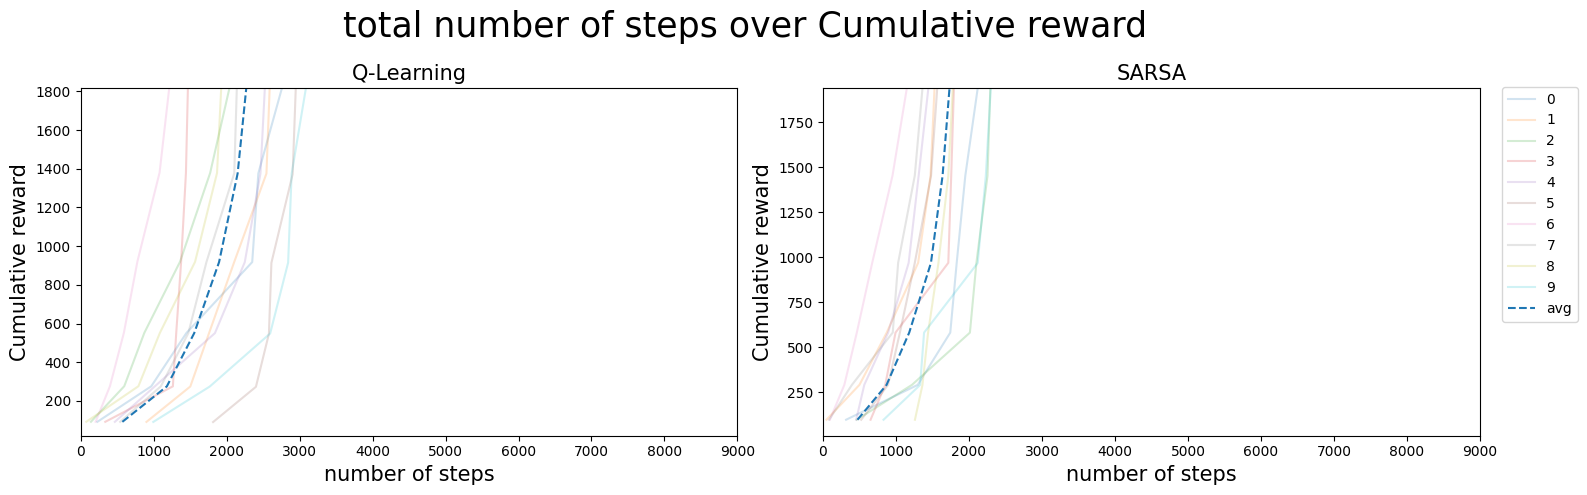

In [15]:
plot_steps([qlearning_data_A2, sarsa_data_A2], [Q_PARAMS_A2_decay_epsilon['EPISODES'], SARSA_PARAMS_A2_decay_epsilon['EPISODES']], ['Q-Learning', 'SARSA'])

# UCB

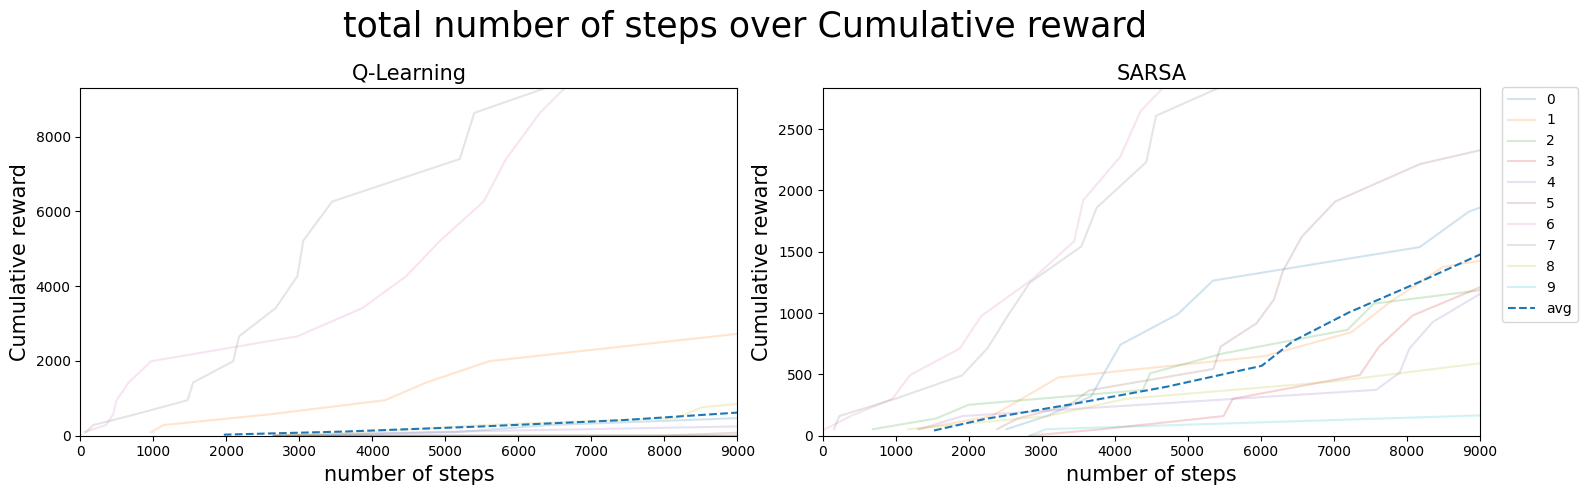

In [16]:
plot_steps([qlearning_data_ucb_A2, sarsa_data_ucb_A2], [Q_PARAMS_A2_ucb['EPISODES'], Q_PARAMS_A2_ucb['EPISODES']], ['Q-Learning', 'SARSA'])

# Epsilon Greedy

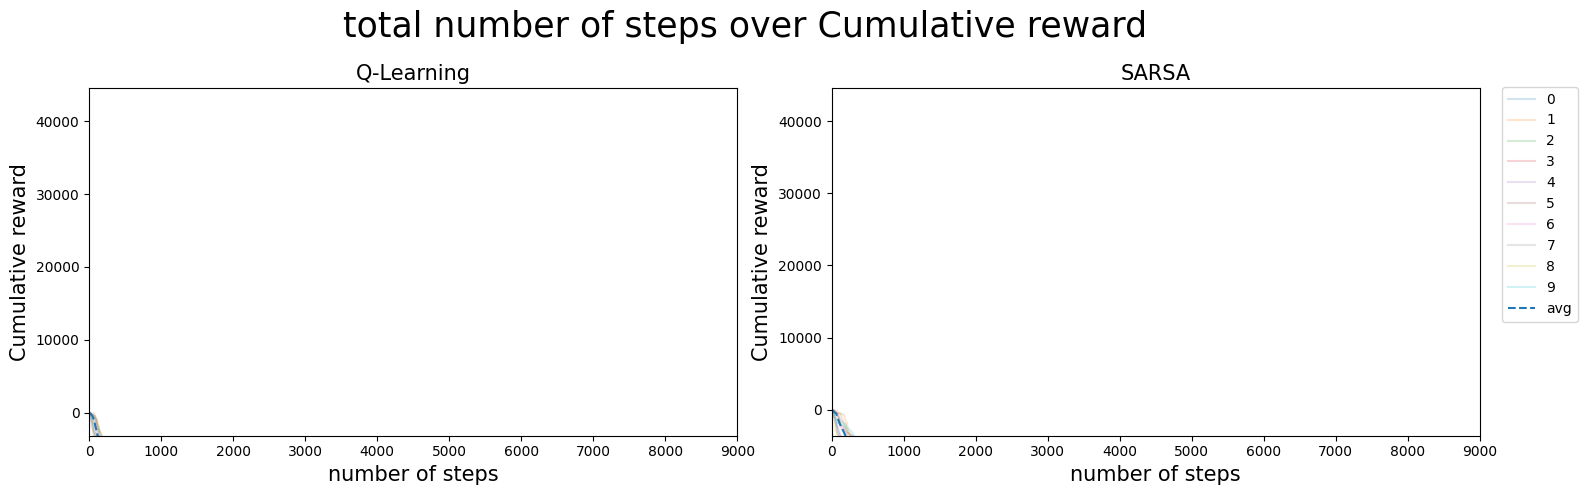

In [17]:
plot_steps([qlearning_data_no_decay, sarsa_data_no_decay], [Q_PARAMS_A2_epsilon['EPISODES'], SARSA_PARAMS_A2_epsilon['EPISODES']], ['Q-Learning', 'SARSA'])
